<a href="https://colab.research.google.com/github/KovryakRuslan312005/MH-Kovryak-Ruslan-3-16/blob/main/%20%D0%9A%D0%BE%D0%B2%D1%80%D1%8F%D0%BA%20%D0%A0%D1%83%D1%81%D0%BB%D0%B0%D0%BD%20%D0%9B%D0%B0%D0%B1%D0%B0%20%E2%84%963.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ковряк Руслан Павлович.Лабораторна робота №3

Крок №1 Завантажуємо бібліотеки для роботи

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

Крок №2 Переглядаємо наші рядки з якими будемо працювати

In [ ]:
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


Крок №3 Перевіряємо пропуски та дублікати

In [ ]:
print(df.isnull().sum())  # Перевірка пропусків
df.fillna(df.mean(), inplace=True)

print("Дублікатів:", df.duplicated().sum())  # Перевірка дублікатів
df.drop_duplicates(inplace=True)

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64
Дублікатів: 0


Крок №4 Перевіряємо змінні

In [ ]:
print(df['sex'].unique())

[ 0.05068012 -0.04464164]


Крок №5 Корекція типів даних

In [ ]:
print(df.dtypes)

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


Крок №6 Робимо Кореляційний аналіз

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


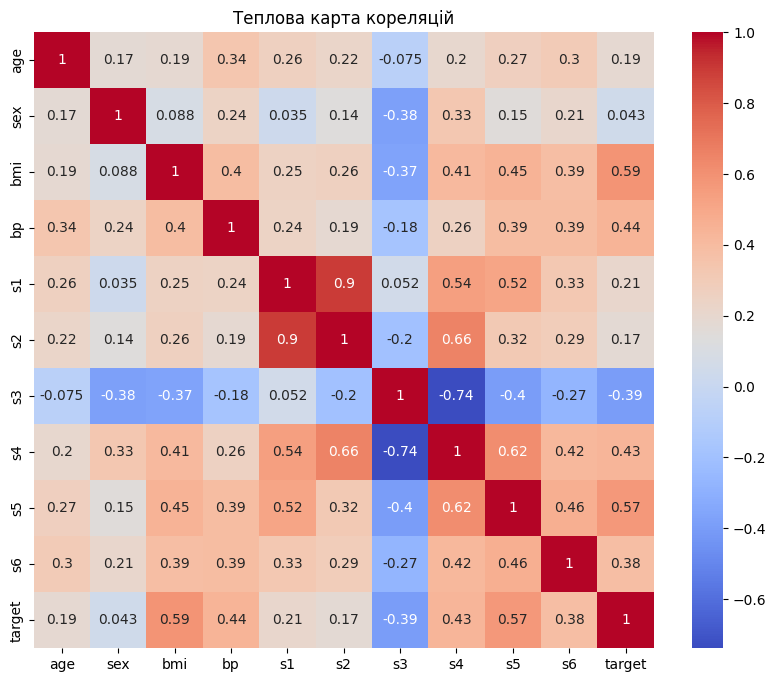

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
print(corr['target'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Теплова карта кореляцій')
plt.show()

Крок №7 Масштабуємо ознаки

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Крок №8 Робимо Поділ на тренувальну та тестову вибірки

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Крок №9  Будуємо моделі Linear Regression та Random Forest

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Лінійна регресія
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# RandomForest з топ-3 ознаками
top_features = corr['target'].abs().sort_values(ascending=False).index[1:4]
X_top = df[top_features]
X_top_scaled = scaler.fit_transform(X_top)

X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_top, y_train_top)
y_pred_rf = rf.predict(X_test_top)


Крок №10 Оцінюємо моделі та графіки

R2 (Linear Regression): 0.4526027629719196
MSE (Linear Regression): 2900.1936284934804
R2 (Random Forest): 0.45372741854843823
MSE (Random Forest): 2894.2350325842694


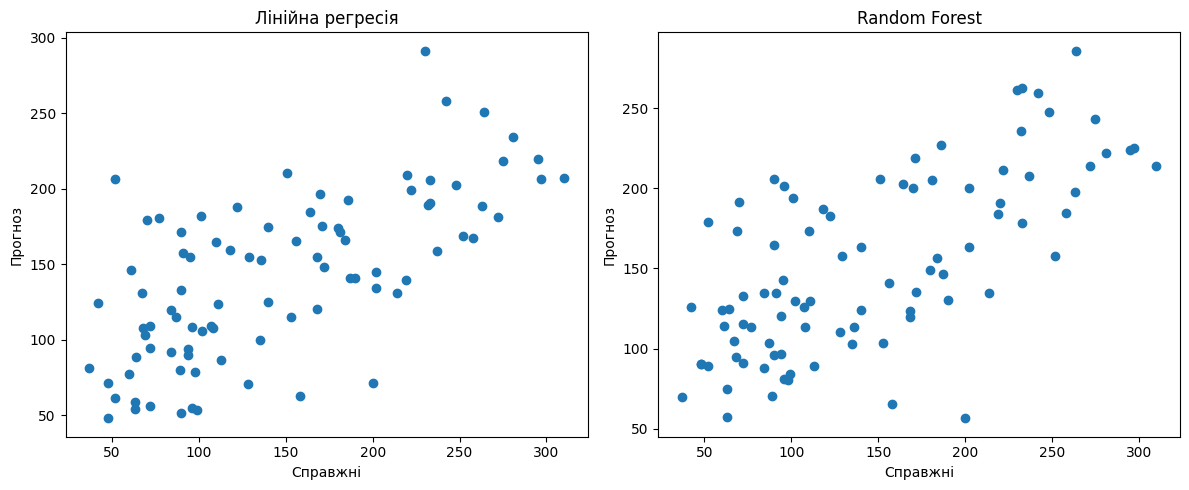

   Справжнє  Прогноз ЛР  Прогноз RF
0     219.0  139.547558      184.13
1      70.0  179.517208      191.45
2     202.0  134.038756      200.09
3     230.0  291.417029      261.35
4     111.0  123.789659      129.76
5      84.0   92.172347       87.71
6     242.0  258.232389      259.74
7     272.0  181.337321      213.59
8      94.0   90.224113      120.38
9      96.0  108.633759      201.23


In [ ]:
 from sklearn.metrics import r2_score, mean_squared_error

print("R2 (Linear Regression):", r2_score(y_test, y_pred_lr))
print("MSE (Linear Regression):", mean_squared_error(y_test, y_pred_lr))

print("R2 (Random Forest):", r2_score(y_test_top, y_pred_rf))
print("MSE (Random Forest):", mean_squared_error(y_test_top, y_pred_rf))

# Побудова графіків
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr)
plt.title('Лінійна регресія')
plt.xlabel('Справжні')
plt.ylabel('Прогноз')

plt.subplot(1, 2, 2)
plt.scatter(y_test_top, y_pred_rf)
plt.title('Random Forest')
plt.xlabel('Справжні')
plt.ylabel('Прогноз')

plt.tight_layout()
plt.show()

# Порівняння значень
results = pd.DataFrame({'Справжнє': y_test.values, 'Прогноз ЛР': y_pred_lr, 'Прогноз RF': y_pred_rf})
print(results.head(10))

Висновок до Лабороторної роботи №3
На цій лабороторній роботі я працював з датасетом (DIABETES),та отримав відповідь на це завдання.А саме як працювати з даним датасетом,робив графіки,прогнози та передивлявся дублікати щоб їх замінити та досягти результату який потрібно.